In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv(r'bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other


In [3]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN


## Method 1. Mapping

In [4]:
data.default.value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [5]:
data['default'] = data['default'].map({'no': 0, 'yes': 1})

#data['default'] = np.where(data['default']=='no',0,1)

In [6]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,0,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,0,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,0,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,0,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,0,0,yes,no,unknown,5,may,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown
4517,57,self-employed,married,tertiary,1,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown
4518,57,technician,married,secondary,0,295,no,no,cellular,19,aug,151,11,-1,0,unknown
4519,28,blue-collar,married,secondary,0,1137,no,no,cellular,6,feb,129,4,211,3,other


## Method 2. Label Encoder

In [7]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

In [8]:
data.marital.value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [9]:
data['marital_LE'] = labelencoder.fit_transform(data['marital'])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,marital_LE
0,30,unemployed,married,primary,0,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,1
1,33,services,married,secondary,0,4789,yes,yes,cellular,11,may,220,1,339,4,failure,1
2,35,management,single,tertiary,0,1350,yes,no,cellular,16,apr,185,1,330,1,failure,2
3,30,management,married,tertiary,0,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,1
4,59,blue-collar,married,secondary,0,0,yes,no,unknown,5,may,226,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,1
4517,57,self-employed,married,tertiary,1,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,1
4518,57,technician,married,secondary,0,295,no,no,cellular,19,aug,151,11,-1,0,unknown,1
4519,28,blue-collar,married,secondary,0,1137,no,no,cellular,6,feb,129,4,211,3,other,1


## Method 3. Dummies with pandas

In [10]:
data = pd.get_dummies(data).astype(int)

In [11]:
data

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,marital_LE,status_divorced,status_married,status_single
0,30,unemployed,primary,0,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,1,0,1,0
1,33,services,secondary,0,4789,yes,yes,cellular,11,may,220,1,339,4,failure,1,0,1,0
2,35,management,tertiary,0,1350,yes,no,cellular,16,apr,185,1,330,1,failure,2,0,0,1
3,30,management,tertiary,0,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,1,0,1,0
4,59,blue-collar,secondary,0,0,yes,no,unknown,5,may,226,1,-1,0,unknown,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,secondary,0,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,1,0,1,0
4517,57,self-employed,tertiary,1,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,1,0,1,0
4518,57,technician,secondary,0,295,no,no,cellular,19,aug,151,11,-1,0,unknown,1,0,1,0
4519,28,blue-collar,secondary,0,1137,no,no,cellular,6,feb,129,4,211,3,other,1,0,1,0


In [27]:
data = pd.read_csv(r'bank.csv')

In [28]:
data1=pd.get_dummies(data, drop_first=True)

In [29]:
data1

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,status_married,status_single
0,30,unemployed,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,1,0
1,33,services,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,1,0
2,35,management,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0,1
3,30,management,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,1,0
4,59,blue-collar,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,1,0
4517,57,self-employed,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,1,0
4518,57,technician,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,1,0
4519,28,blue-collar,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,1,0


## Method 4. Weight of evidence

Weight of Evidence (WoE) measures the “strength” of a grouping technique to separate good and bad. 

This method was developed primarily to build a predictive model to evaluate the risk of loan default in the credit and financial industry. 

Weight of evidence (WOE) measures how much the evidence supports or undermines a hypothesis.

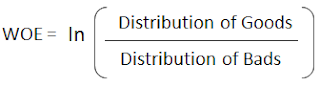

In [4]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other


## WOE for categorical columns

In [5]:
data.education.value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [6]:
data['default'] = data['default'].map({'no': 0, 'yes': 1})

In [7]:
# Calculate the number of observations in each category that belong to the positive and negative classes
grouped = data.groupby(['education', 'default']).agg({'default':'count'})

grouped

default
education default         
primary   0            668
          1             10
secondary 0           2260
          1             46
tertiary  0           1333
          1             17
unknown   0            184
          1              3

In [8]:
   
# Calculate the number of observations in each category that belong to the positive and negative classes
grouped = data.groupby(['education', 'default'])['default'].count().unstack().reset_index()

grouped

default,education,0,1
0,primary,668,10
1,secondary,2260,46
2,tertiary,1333,17
3,unknown,184,3


In [9]:
grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
  
grouped


default,education,0,1,positive_prop,negative_prop
0,primary,668,10,0.150281,0.131579
1,secondary,2260,46,0.508436,0.605263
2,tertiary,1333,17,0.299888,0.223684
3,unknown,184,3,0.041395,0.039474


In [10]:
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
    
grouped.rename(columns={'woe':'education_woe'}, inplace=True)

grouped

default,education,0,1,positive_prop,negative_prop,education_woe
0,primary,668,10,0.150281,0.131579,0.132901
1,secondary,2260,46,0.508436,0.605263,-0.174323
2,tertiary,1333,17,0.299888,0.223684,0.293172
3,unknown,184,3,0.041395,0.039474,0.047522


In [11]:
data = data.merge(grouped[['education','education_woe']], how='left', on='education')
data.drop('education', axis=1, inplace=True)

data


,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,education_woe
0,30,unemployed,married,0,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0.132901
1,33,services,married,0,4789,yes,yes,cellular,11,may,220,1,339,4,failure,-0.174323
2,35,management,single,0,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0.293172
3,30,management,married,0,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0.293172
4,59,blue-collar,married,0,0,yes,no,unknown,5,may,226,1,-1,0,unknown,-0.174323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,0,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,-0.174323
4517,57,self-employed,married,1,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0.293172
4518,57,technician,married,0,295,no,no,cellular,19,aug,151,11,-1,0,unknown,-0.174323
4519,28,blue-collar,married,0,1137,no,no,cellular,6,feb,129,4,211,3,other,-0.174323


## WOE for numerical columns

In [12]:
data

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,education_woe
0,30,unemployed,married,0,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0.132901
1,33,services,married,0,4789,yes,yes,cellular,11,may,220,1,339,4,failure,-0.174323
2,35,management,single,0,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0.293172
3,30,management,married,0,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0.293172
4,59,blue-collar,married,0,0,yes,no,unknown,5,may,226,1,-1,0,unknown,-0.174323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,0,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,-0.174323
4517,57,self-employed,married,1,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0.293172
4518,57,technician,married,0,295,no,no,cellular,19,aug,151,11,-1,0,unknown,-0.174323
4519,28,blue-collar,married,0,1137,no,no,cellular,6,feb,129,4,211,3,other,-0.174323


In [13]:
data.age.describe()

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

In [14]:
ranges = [18, 30, 45, 88] 
labels_added = ['young', 'adult', 'senior']


data['category'] = pd.cut(data['age'], bins=ranges, labels=labels_added)

data.head(15)

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,education_woe,category
0,30,unemployed,married,0,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0.132901,young
1,33,services,married,0,4789,yes,yes,cellular,11,may,220,1,339,4,failure,-0.174323,adult
2,35,management,single,0,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0.293172,adult
3,30,management,married,0,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0.293172,young
4,59,blue-collar,married,0,0,yes,no,unknown,5,may,226,1,-1,0,unknown,-0.174323,senior
5,35,management,single,0,747,no,no,cellular,23,feb,141,2,176,3,failure,0.293172,adult
6,36,self-employed,married,0,307,yes,no,cellular,14,may,341,1,330,2,other,0.293172,adult
7,39,technician,married,0,147,yes,no,cellular,6,may,151,2,-1,0,unknown,-0.174323,adult
8,41,entrepreneur,married,0,221,yes,no,unknown,14,may,57,2,-1,0,unknown,0.293172,adult
9,43,services,married,0,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,0.132901,adult


In [15]:
grouped = data.groupby(['category', 'default'])['default'].count().unstack().reset_index()

grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
    
grouped

default,category,0,1,positive_prop,negative_prop,woe
0,young,616,16,0.138583,0.210526,-0.418144
1,adult,2373,35,0.533858,0.460526,0.147760
2,senior,1456,25,0.327559,0.328947,-0.004229


In [17]:
grouped.rename(columns={'woe': 'age_woe'}, inplace=True)


data = data.merge(grouped[['category', 'age_woe']], how='left', on='category')


data.drop('category', axis=1, inplace=True)

data

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,education_woe,age_woe
0,30,unemployed,married,0,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0.132901,-0.418144
1,33,services,married,0,4789,yes,yes,cellular,11,may,220,1,339,4,failure,-0.174323,0.147760
2,35,management,single,0,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0.293172,0.147760
3,30,management,married,0,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0.293172,-0.418144
4,59,blue-collar,married,0,0,yes,no,unknown,5,may,226,1,-1,0,unknown,-0.174323,-0.004229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,0,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,-0.174323,0.147760
4517,57,self-employed,married,1,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0.293172,-0.004229
4518,57,technician,married,0,295,no,no,cellular,19,aug,151,11,-1,0,unknown,-0.174323,-0.004229
4519,28,blue-collar,married,0,1137,no,no,cellular,6,feb,129,4,211,3,other,-0.174323,-0.418144


In [18]:
ranges = [-np.inf, data['age'].quantile(0.25), data['age'].quantile(0.5), data['age'].quantile(0.75), np.inf]
# np.inf for infinity
data['category'] = pd.cut(data['age'], bins=ranges)
    
data

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,education_woe,age_woe,category
0,30,unemployed,married,0,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0.132901,-0.418144,"(-inf, 33.0]"
1,33,services,married,0,4789,yes,yes,cellular,11,may,220,1,339,4,failure,-0.174323,0.147760,"(-inf, 33.0]"
2,35,management,single,0,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0.293172,0.147760,"(33.0, 39.0]"
3,30,management,married,0,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0.293172,-0.418144,"(-inf, 33.0]"
4,59,blue-collar,married,0,0,yes,no,unknown,5,may,226,1,-1,0,unknown,-0.174323,-0.004229,"(49.0, inf]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,0,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,-0.174323,0.147760,"(-inf, 33.0]"
4517,57,self-employed,married,1,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0.293172,-0.004229,"(49.0, inf]"
4518,57,technician,married,0,295,no,no,cellular,19,aug,151,11,-1,0,unknown,-0.174323,-0.004229,"(49.0, inf]"
4519,28,blue-collar,married,0,1137,no,no,cellular,6,feb,129,4,211,3,other,-0.174323,-0.418144,"(-inf, 33.0]"


In [19]:
grouped = data.groupby(['category', 'default'])['default'].count().unstack().reset_index()

grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
    
grouped

default,category,0,1,positive_prop,negative_prop,woe
0,"(-inf, 33.0]",1212,29,0.272666,0.381579,-0.336070
1,"(33.0, 39.0]",1039,10,0.233746,0.131579,0.574627
2,"(39.0, 49.0]",1180,23,0.265467,0.302632,-0.131026
3,"(49.0, inf]",1014,14,0.228121,0.184211,0.213799


In [20]:
grouped.rename(columns={'woe':'age_woe_quantile'}, inplace=True)

data = data.merge(grouped[['category','age_woe_quantile']], how='left', on='category')

data.drop('category', axis=1, inplace=True)
data

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,education_woe,age_woe,age_woe_quantile
0,30,unemployed,married,0,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0.132901,-0.418144,-0.336070
1,33,services,married,0,4789,yes,yes,cellular,11,may,220,1,339,4,failure,-0.174323,0.147760,-0.336070
2,35,management,single,0,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0.293172,0.147760,0.574627
3,30,management,married,0,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0.293172,-0.418144,-0.336070
4,59,blue-collar,married,0,0,yes,no,unknown,5,may,226,1,-1,0,unknown,-0.174323,-0.004229,0.213799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,0,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,-0.174323,0.147760,-0.336070
4517,57,self-employed,married,1,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0.293172,-0.004229,0.213799
4518,57,technician,married,0,295,no,no,cellular,19,aug,151,11,-1,0,unknown,-0.174323,-0.004229,0.213799
4519,28,blue-collar,married,0,1137,no,no,cellular,6,feb,129,4,211,3,other,-0.174323,-0.418144,-0.336070


In [21]:
data.isnull().sum()

age                 0
job                 0
marital             0
default             0
balance             0
housing             0
loan                0
contact             0
day                 0
month               0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
education_woe       0
age_woe             0
age_woe_quantile    0
dtype: int64